In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('normalization_minmax.csv')
df.head(5)

,Unnamed: 0,회원번호,회원이름,주소,상품금액,총불입액,해약금액,담당자,연체횟수,성별,나이,진행률,상태
0,0,0022A00001,이옥성590318,경기,0.208283,0.491725,0.501548,더피플라이프,0.008333,0,0.404040,1.00,0
1,1,0072A00001,안성열581125,경기,0.208283,0.491725,0.000000,더피플라이프,0.008333,0,0.414141,1.00,2
2,2,0072A00002,배준택831121,부산,0.208283,0.334324,0.000000,더피플라이프,0.275000,0,0.161616,0.68,3
3,3,0072A00003,배민규821023,울산,0.208283,0.491725,0.000000,더피플라이프,0.008333,0,0.171717,1.00,2
4,4,0072A00006,최금순340728,경기,0.208283,0.491725,0.000000,더피플라이프,0.008333,1,0.656566,1.00,2


In [3]:
df=df[['상품금액','총불입액','해약금액','연체횟수','성별','나이','진행률','상태']]

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = df[['상품금액','총불입액','해약금액','연체횟수','성별','나이','진행률']]
rf.data = rf.values.tolist()
rf.target = df[['상태']]
rf.feature_names=['price','total_payed_price','canceld_price','delay_pay_num','sex','age','p_rate']
rf.target_names=['final_cancel','cancel','event','signup','final']
rf.head(3)


,상품금액,총불입액,해약금액,연체횟수,성별,나이,진행률
0,0.208283,0.491725,0.501548,0.008333,0,0.404040,1.00
1,0.208283,0.491725,0.000000,0.008333,0,0.414141,1.00
2,0.208283,0.334324,0.000000,0.275000,0,0.161616,0.68


In [5]:
X_train , X_test , y_train , y_test = train_test_split(rf.data, rf.target, test_size=0.3,  random_state=33)
rnd_clf = RandomForestClassifier(n_estimators=250, max_depth=9 , n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred_rf)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9430


In [6]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.metrics import f1_score 

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred,average='macro')
    recall = recall_score(y_test , pred, average='macro')
    # F1 스코어 추가
    f1 = f1_score(y_test,pred, average='macro')
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [9]:
get_clf_eval(y_test,y_pred_rf )
y_pred_rf 

오차 행렬
[[ 1124     0     0     0     0]
 [    0 24685     0   744     0]
 [    0     0  1240     7  1618]
 [    0   927     0 30968     0]
 [    0    19   363     0  2834]]
정확도: 0.9430, 정밀도: 0.8699, 재현율: 0.8511, F1:0.8470


array([1, 1, 1, ..., 3, 1, 1], dtype=int64)

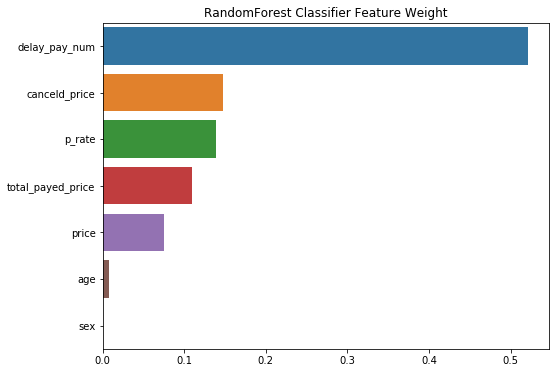

In [12]:
import seaborn as sns

ftr_importances_values = rnd_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=rf.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:7]

plt.figure(figsize=(8,6))
plt.title('RandomForest Classifier Feature Weight')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [13]:
dtree = df[['상품금액','총불입액','해약금액','연체횟수','성별','나이','진행률']]
dtree.data = dtree.values.tolist()
dtree.target = df[['상태']]
dtree.feature_names=['price','total_payed_price','canceld_price','delay_pay_num','sex','age','p_rate']
dtree.target_names=['final_cancel','cancel','event','signup','final']
dtree.head(3)

,상품금액,총불입액,해약금액,연체횟수,성별,나이,진행률
0,0.208283,0.491725,0.501548,0.008333,0,0.404040,1.00
1,0.208283,0.491725,0.000000,0.008333,0,0.414141,1.00
2,0.208283,0.334324,0.000000,0.275000,0,0.161616,0.68


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    dtree.data, dtree.target, stratify=dtree.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.968
테스트 세트 정확도: 0.943


In [16]:
depth = [2,4,6,8,9,10,12,14,16]
for x in depth:
    tree = DecisionTreeClassifier(max_depth=x, random_state=0)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    print("Depth : ",x)
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

Depth :  2
훈련 세트 정확도: 0.888
테스트 세트 정확도: 0.888
Depth :  4
훈련 세트 정확도: 0.927
테스트 세트 정확도: 0.926
Depth :  6
훈련 세트 정확도: 0.940
테스트 세트 정확도: 0.938
Depth :  8
훈련 세트 정확도: 0.943
테스트 세트 정확도: 0.941
Depth :  9
훈련 세트 정확도: 0.945
테스트 세트 정확도: 0.942
Depth :  10
훈련 세트 정확도: 0.946
테스트 세트 정확도: 0.942
Depth :  12
훈련 세트 정확도: 0.950
테스트 세트 정확도: 0.943
Depth :  14
훈련 세트 정확도: 0.954
테스트 세트 정확도: 0.942
Depth :  16
훈련 세트 정확도: 0.958
테스트 세트 정확도: 0.942


In [17]:
tree = DecisionTreeClassifier(max_depth=12, random_state=0)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)


print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.950
테스트 세트 정확도: 0.943


In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree2.dot", class_names=dtree.target_names,
                feature_names=dtree.feature_names, impurity=False, filled=True)

In [4]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.007 0.015 0.102 0.627 0.001 0.01  0.238]
price : 0.007
total_payed_price : 0.015
canceld_price : 0.102
delay_pay_num : 0.627
sex : 0.001
age : 0.010
p_rate : 0.238


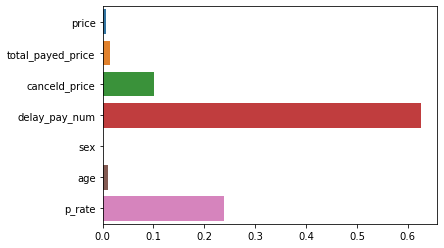

In [23]:
print("Feature importances:\n{0}".format(np.round(tree.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(dtree.feature_names , tree.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=tree.feature_importances_ , y=dtree.feature_names)

In [5]:
df

NameError: name 'df' is not defined